<a href="https://colab.research.google.com/github/Najrul-Ansari/Classification-with-Neural-Networks/blob/main/Binary_Classification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

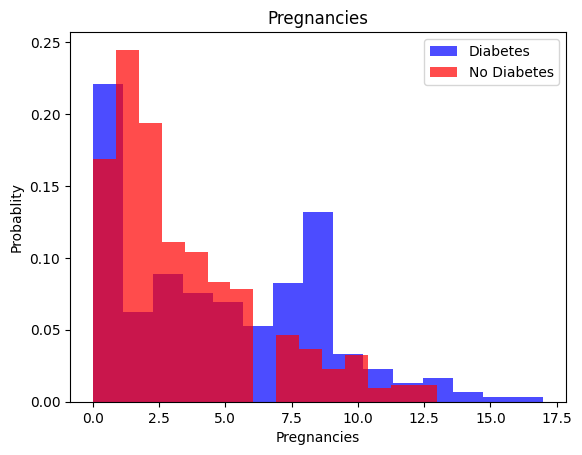

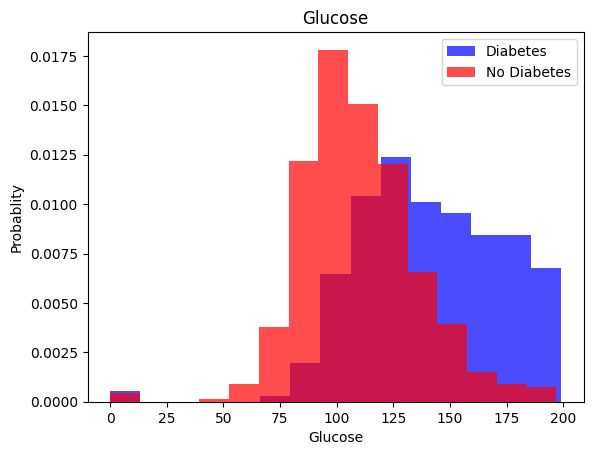

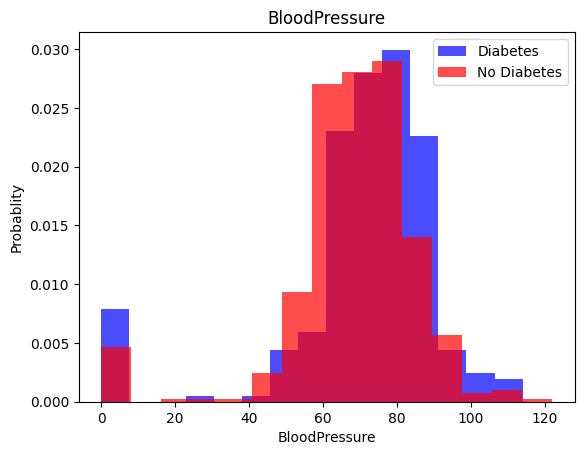

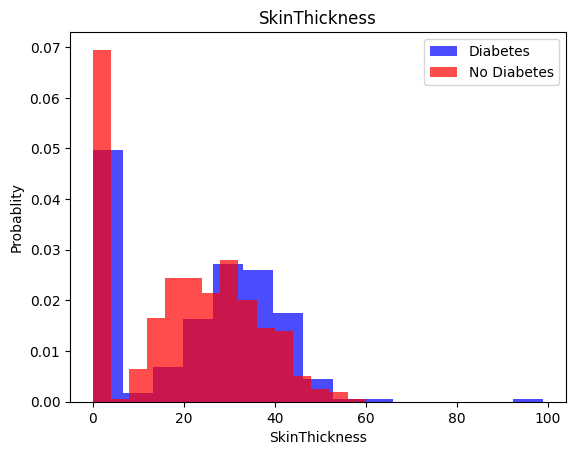

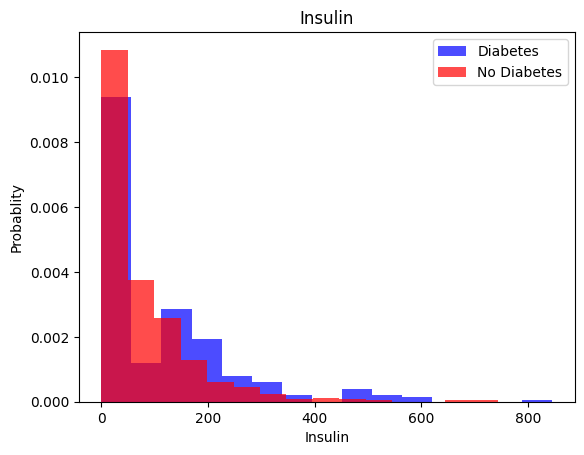

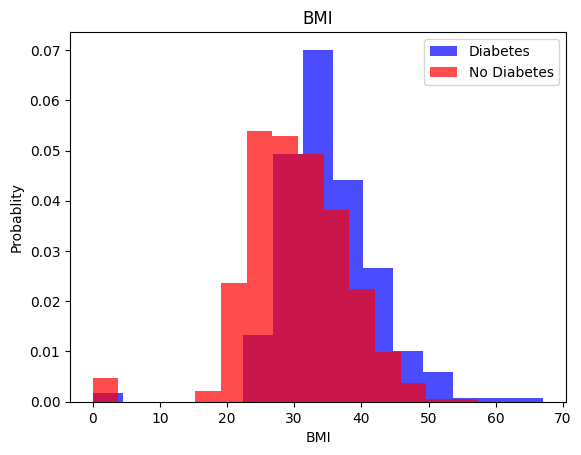

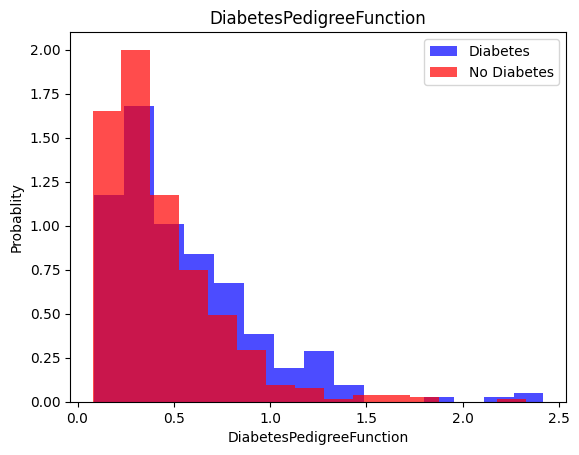

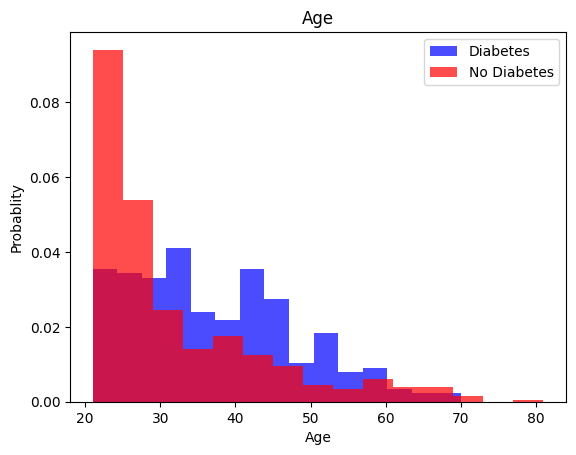

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df["Outcome"] ==1][label], color = 'blue', label = "Diabetes", alpha = 0.7, density = True, bins = 15)
  plt.hist(df[df["Outcome"] ==0][label],color = 'red', label = "No Diabetes", alpha = 0.7, density = True, bins = 15)
  plt.title(label)
  plt.ylabel("Probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

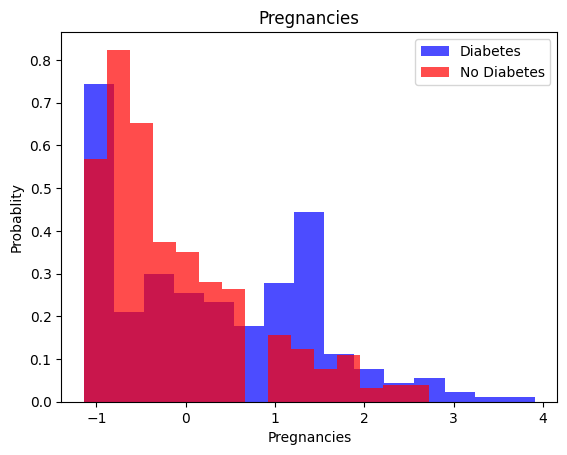

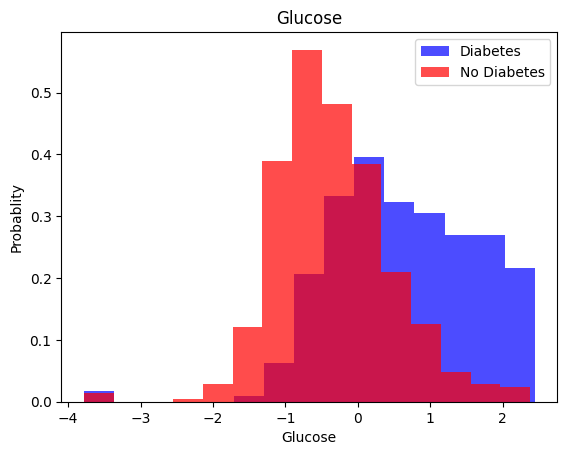

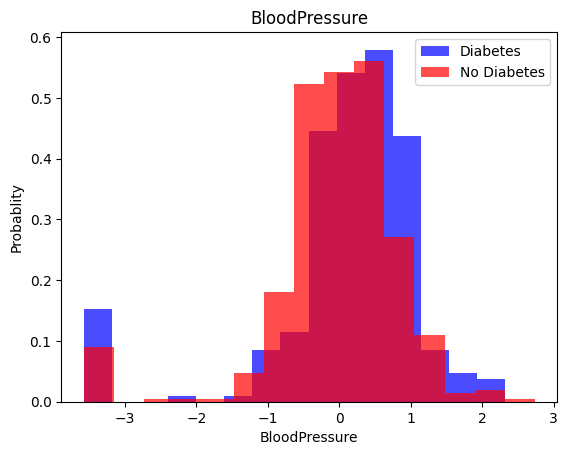

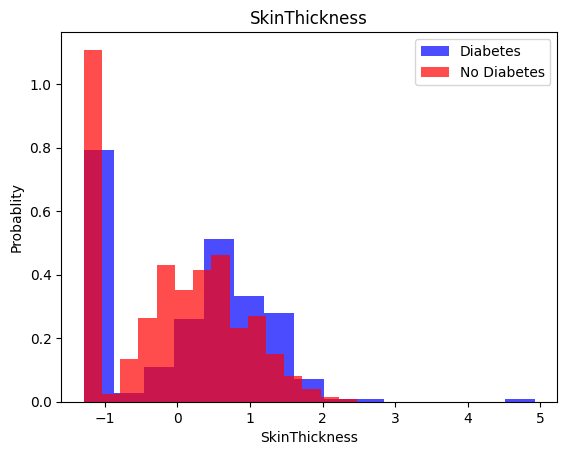

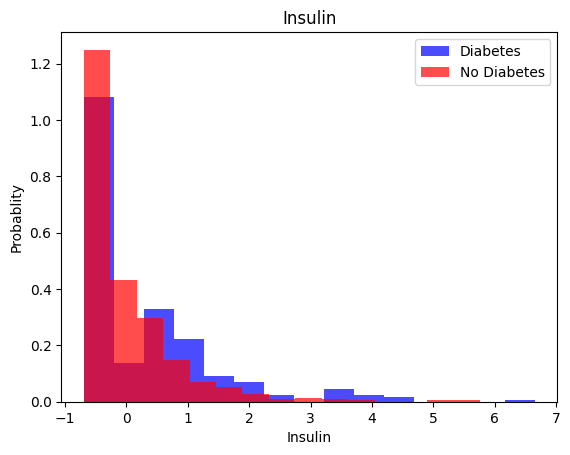

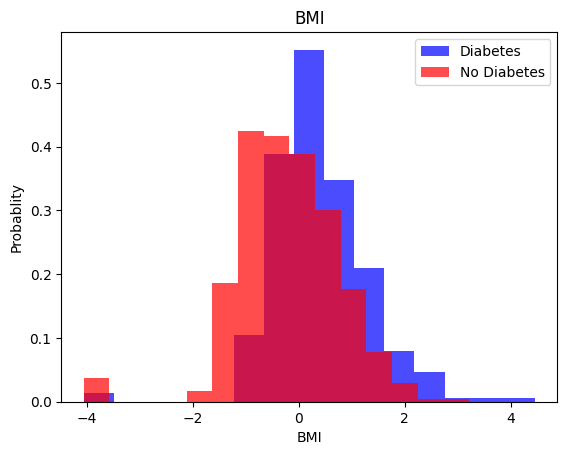

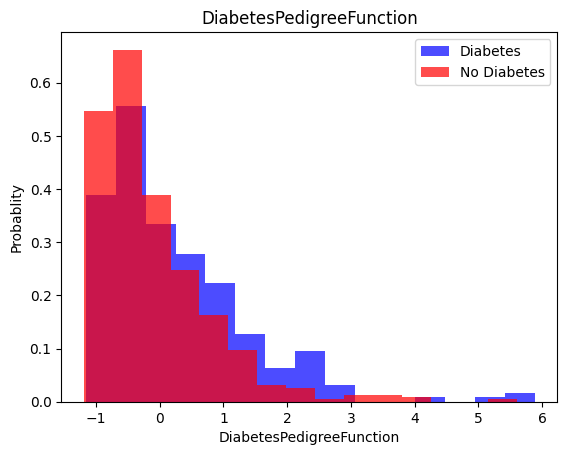

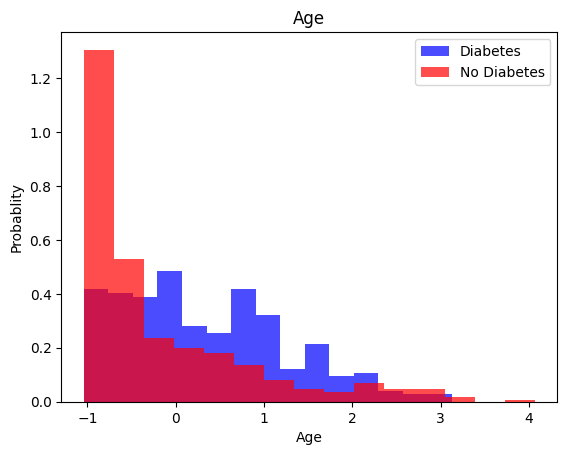

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df["Outcome"] ==1][label], color = 'blue', label = "Diabetes", alpha = 0.7, density = True, bins = 15)
  plt.hist(transformed_df[transformed_df["Outcome"] ==0][label],color = 'red', label = "No Diabetes", alpha = 0.7, density = True, bins = 15)
  plt.title(label)
  plt.ylabel("Probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
over = RandomOverSampler()
x, y = over.fit_resample(x,y)
data = np.hstack((x, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

In [ ]:
len(transformed_df[transformed_df['Outcome'] == 1]), len(transformed_df[transformed_df['Outcome'] == 0])

(500, 500)

In [ ]:
x_train,x_temp,y_train,y_temp = train_test_split(x,y, test_size = 0.4, random_state = 0)
x_valid,x_test,y_valid,y_test = train_test_split(x_temp,y_temp, test_size = 0.5, random_state = 0)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation = 'relu'),# if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics =["accuracy"])

In [ ]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7268 - accuracy: 0.5100


[0.726801872253418, 0.5099999904632568]

In [ ]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.7283 - accuracy: 0.5250


[0.7282512784004211, 0.5249999761581421]

In [ ]:
model.fit(x_train,y_train,batch_size=15, epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
40/40 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.5533 - val_loss: 0.6718 - val_accuracy: 0.6100
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.6650 - val_loss: 0.6320 - val_accuracy: 0.6700
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7183 - val_loss: 0.5997 - val_accuracy: 0.6950
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7300 - val_loss: 0.5703 - val_accuracy: 0.7150
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5467 - accuracy: 0.7417 - val_loss: 0.5477 - val_accuracy: 0.7500
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7467 - val_loss: 0.5269 - val_accuracy: 0.7600
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.7550 - val_loss: 0.5161 - val_accuracy: 0.7450
Epoch 8/20
40/40 [==

In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5065 - accuracy: 0.7750


[0.506547212600708, 0.7749999761581421]